<h1 style="font-size: 64px;">Mnist Classification</h1>

# Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import seaborn as sns

# Load Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing Data

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Visualization

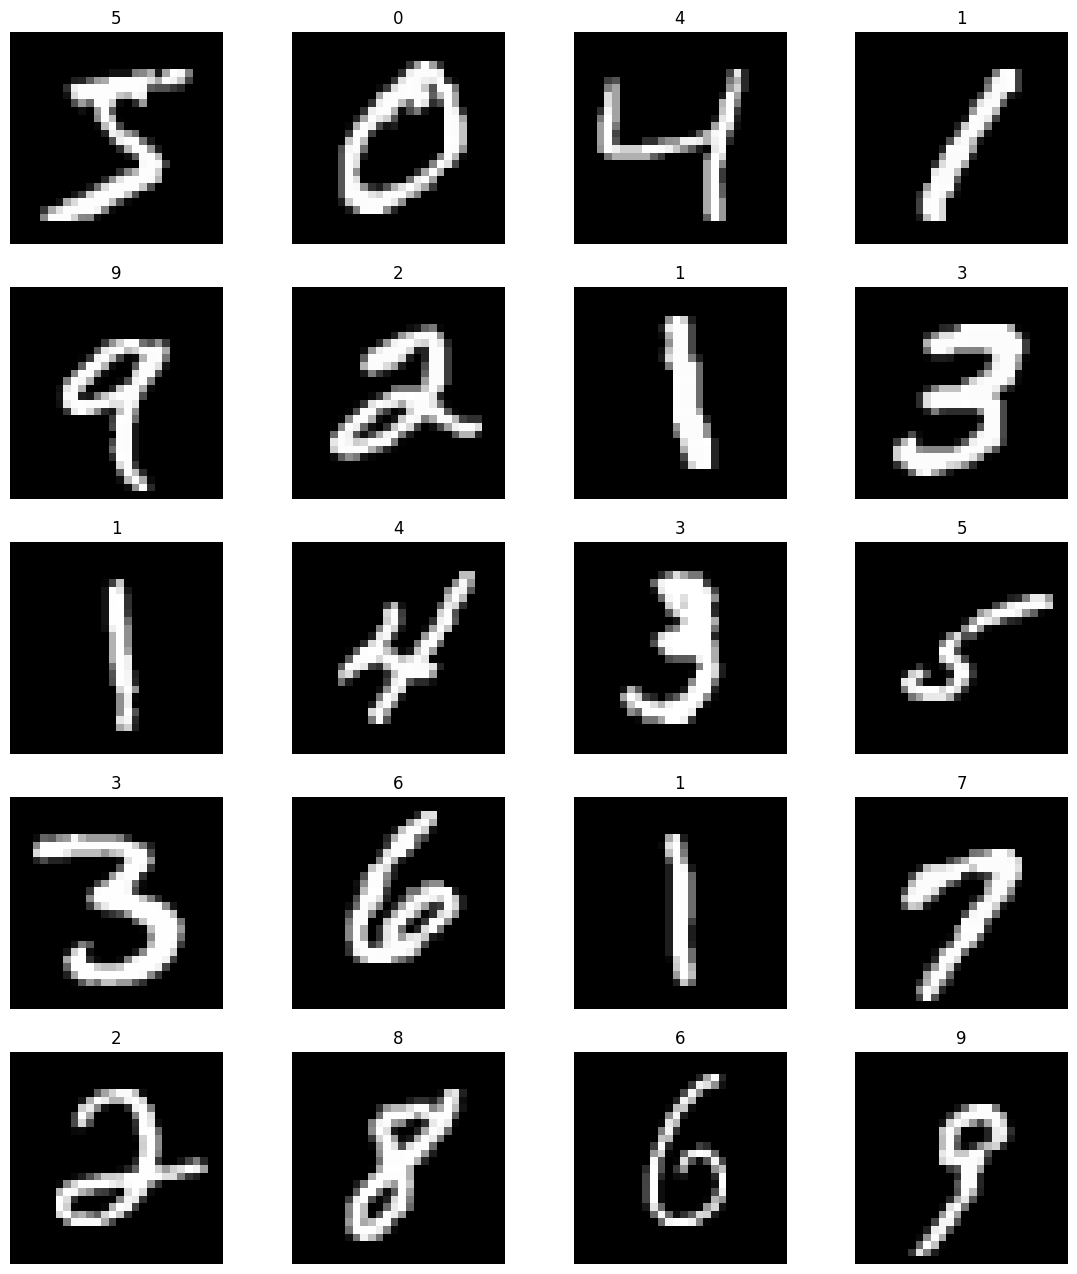

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16))
axes = axes.ravel()

for i in range(20):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(train_labels[i].argmax())
    axes[i].axis('off')

plt.subplots_adjust(wspace=-0.6, hspace=0.2)
plt.show()


# Model Architecture and Training

In [6]:
def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = create_cnn_model()


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history = model.fit(train_images, train_labels, epochs=8, batch_size=64, validation_split=0.2)

Epoch 1/8
750/750 [==============================] - 34s 43ms/step - loss: 0.3868 - accuracy: 0.8764 - val_loss: 0.1049 - val_accuracy: 0.9697
Epoch 2/8
750/750 [==============================] - 32s 43ms/step - loss: 0.1272 - accuracy: 0.9609 - val_loss: 0.0797 - val_accuracy: 0.9757
Epoch 3/8
750/750 [==============================] - 32s 43ms/step - loss: 0.0974 - accuracy: 0.9702 - val_loss: 0.0628 - val_accuracy: 0.9821
Epoch 4/8
750/750 [==============================] - 32s 43ms/step - loss: 0.0814 - accuracy: 0.9745 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 5/8
750/750 [==============================] - 32s 43ms/step - loss: 0.0684 - accuracy: 0.9783 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 6/8
750/750 [==============================] - 32s 43ms/step - loss: 0.0613 - accuracy: 0.9803 - val_loss: 0.0550 - val_accuracy: 0.9841
Epoch 7/8
750/750 [==============================] - 32s 43ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.0448 - val_accuracy: 0.9862

# Plotting

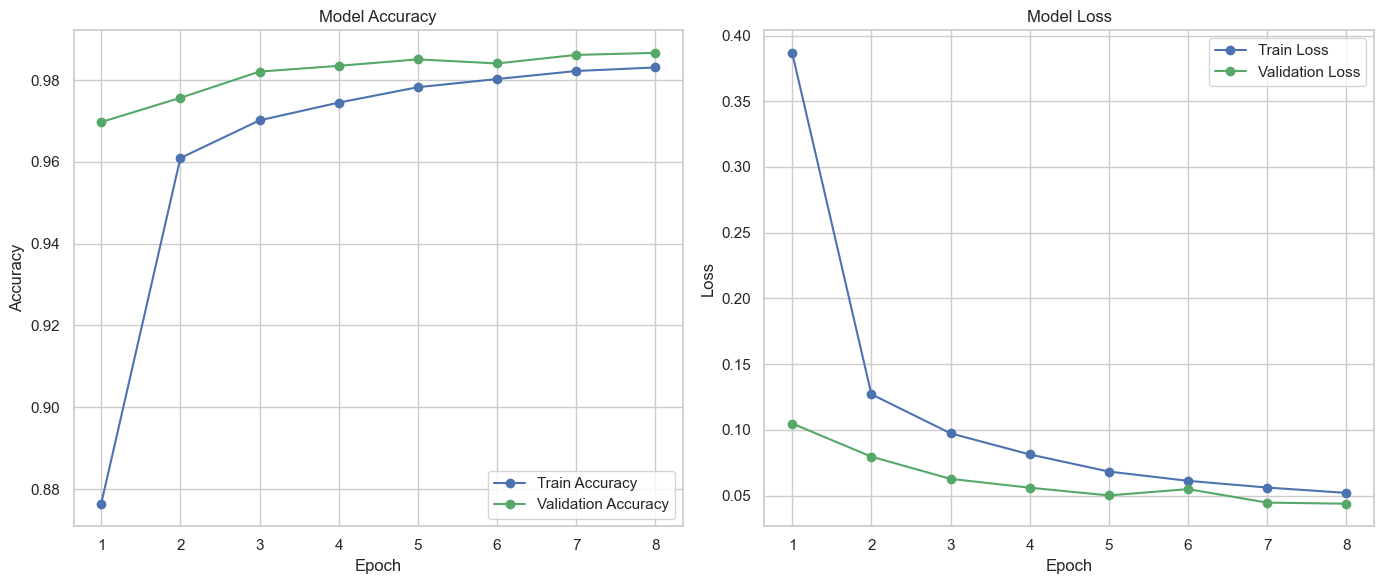

In [9]:
epochs = range(1, len(history.history['accuracy']) + 1)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], marker='o', linestyle='-', color='g', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], marker='o', linestyle='-', color='b', label='Train Loss')
plt.plot(epochs, history.history['val_loss'], marker='o', linestyle='-', color='g', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.tight_layout()
plt.show()


# Testing

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 9ms/step - loss: 0.0448 - accuracy: 0.9855
Test accuracy: 0.9854999780654907


# Saving Model

In [12]:
model.save("mnist_model.keras")